# this notebook will perform a hierarchical clustering on the raw behavioral scores

Written by Angela Tam & CBIG under MIT license: https://github.com/ThomasYeoLab/CBIG/blob/master/LICENSE.md

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.cluster.hierarchy as sch
import os

In [2]:
def cluster_mat(df, list_var, c_dict, path_out, fname, thresh=3):
    df_corr = df[list_var].corr()
    df_h = df_corr.copy()
    corr = df_h.values
    # perform the clustering
    pdist = sch.distance.pdist(corr)
    linkage = sch.linkage(pdist, method='average')
    #idx = sch.fcluster(linkage, 0.5 * pdist.max(), 'distance')
    idx = sch.fcluster(linkage, t=3, criterion='maxclust')
    # plot dendrogram
    #plt.figure(figsize=(6,2))
    plt.figure(figsize=(12,4))
    plt.ylabel('distance')
    r = sch.dendrogram(linkage, color_threshold=thresh, labels=list_var, leaf_rotation=90)
    ax = plt.gca()
    xlbls = ax.get_xmajorticklabels()
    for lbl in xlbls:
        lbl.set_color(c_dict[lbl.get_text()])
    if isinstance(path_out, str):
        plt.savefig(path_out + '/dendrogram_' + fname + '.pdf')
    
    # plot rearranged clustered correlation matrix
    cols = r['ivl']
    df_h = df_h.reindex_axis(cols,axis=1)
    df_h = df_h.reindex_axis(cols,axis=0)
    plt.figure(figsize=(10,8))
    g = sns.heatmap(df_h, vmin=-0.8, vmax=0.8, cmap="BrBG",
            xticklabels=df_h.columns,
            yticklabels=df_h.columns)
    for tick_label in g.get_yticklabels():
        tick_text = tick_label.get_text()
        tick_label.set_color(c_dict[tick_text])
    for tick_label in g.get_xticklabels():
        tick_text = tick_label.get_text()
        tick_label.set_color(c_dict[tick_text])
    if isinstance(path_out, str):
        plt.savefig(path_out + '/sim_matrix_' + fname + '.pdf')
    return idx, cols, df_h

In [3]:
# set random seed
np.random.seed(seed=1)

### SET OUTPUT DIRECTORY

In [4]:
# set output directory, default is None - no output will be saved unless changed
path_out = None

### set up variables

In [5]:
# input directories
# private input
in_dir_priv = os.getenv('CBIG_REPDATA_DIR') + '/stable_projects/predict_phenotypes/ChenTam2021_TRBPC/figures/input'
# public input
in_dir_pub = os.getenv('CBIG_CODE_DIR') + '/stable_projects/predict_phenotypes/ChenTam2021_TRBPC/figure_utilities/input'

In [6]:
df_demog = pd.read_csv(in_dir_priv + '/abcd_2.0_demog_cog_neuropsych_completecases_groupsites.csv')

In [7]:
# load list of behaviors (named by ABCD)
list_var = []
with open(in_dir_pub + '/variables_to_predict_abcd.txt') as file:
    for line in file:
        line = line.strip()
        list_var.append(line)

In [8]:
# load list of behaviors (named by us in 'lay people' terms)
list_var_lay = []
with open(in_dir_pub + '/variables_to_predict.txt') as file:
    for line in file:
        line = line.strip()
        list_var_lay.append(line)

In [9]:
# change the test names to more laypeople terms
df_demog.rename(dict(zip(list_var,list_var_lay)),axis=1,inplace=True)
df_demog.rename(dict(zip(list_var,list_var_lay)),axis=0,inplace=True)

In [10]:
# rearrange the list of variables according to hypothesis-driven clusters of significant behaviors
list_hyp = ['vocabulary',
          'attention',
          'working memory',
          'executive function',
          'processing speed',
          'episodic memory',
          'reading',
          'fluid cognition',
          'crystallized cognition',
          'overall cognition',
          'short delay recall',
          'long delay recall',
          'fluid intelligence',
          'visuospatial accuracy',
          'visuospatial reaction time',
          'visuospatial efficiency',
          'negative urgency',
          'lack of planning',
          'sensation seeking',
          'positive urgency',
          'lack perseverance',
          'behavioral inhibition',
          'reward responsiveness',
          'drive',
          'fun seeking',
          'anxious depressed',
          'somatic complaints',
          'social problems',
          'thought problems',
          'attention problems',
          'total psychosis symptoms',
          'psychosis severity']

In [11]:
# dictionary for colours of different behavioural scales
c_dict = {'vocabulary':'red',
          'attention':'red',
          'working memory':'red',
          'executive function':'red',
          'processing speed':'red',
          'episodic memory':'red',
          'reading':'red',
          'fluid cognition':'red',
          'crystallized cognition':'red',
          'overall cognition':'red',
          'short delay recall':'firebrick',
          'long delay recall':'firebrick',
          'fluid intelligence':'orangered',
          'visuospatial accuracy':'lightcoral',
          'visuospatial reaction time':'lightcoral',
          'visuospatial efficiency':'lightcoral',
          'anxious depressed':'blue',
          'somatic complaints':'blue',
          'social problems':'blue',
          'thought problems':'blue',
          'attention problems':'blue',
          'total psychosis symptoms':'cornflowerblue',
          'psychosis severity':'cornflowerblue',
          'negative urgency':'black',
          'lack of planning':'black',
          'sensation seeking':'black',
          'positive urgency':'black',
          'lack perseverance':'black',
          'behavioral inhibition':'dimgrey',
          'reward responsiveness':'dimgrey',
          'drive':'dimgrey',
          'fun seeking':'dimgrey'}

## perform a hierarchical clustering

/data/users/atam/miniconda/envs/trbpc_py/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
/data/users/atam/miniconda/envs/trbpc_py/lib/python3.6/site-packages/ipykernel_launcher.py:25: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


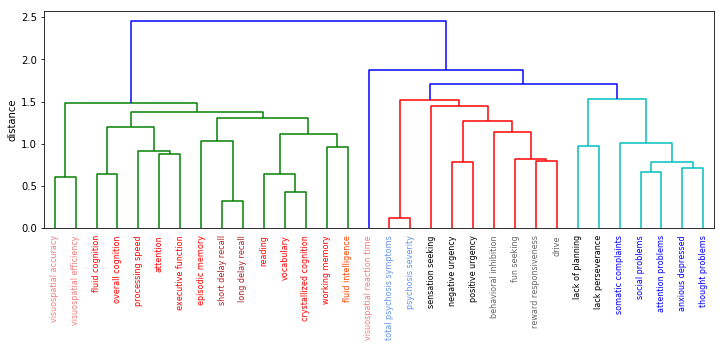

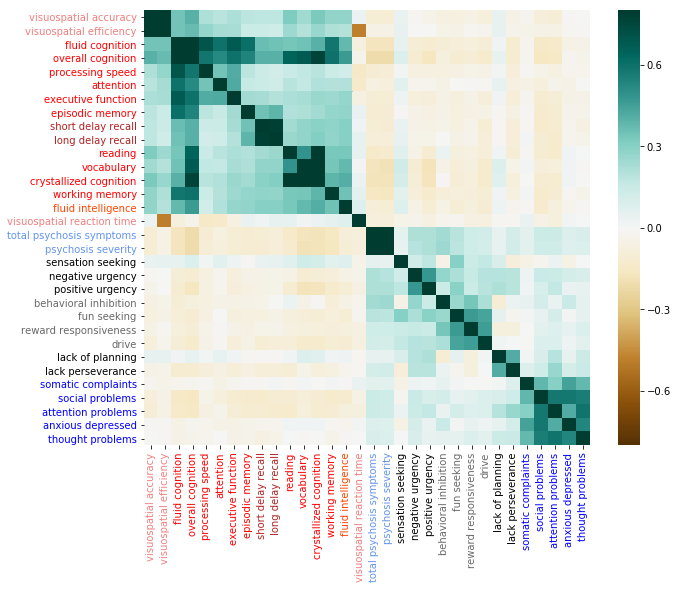

In [12]:
[idx, list_r, df_corr_hi] = cluster_mat(df_demog[list_hyp], list_hyp, 
                                        c_dict, path_out, 'behavior', thresh=1.7)

### correlations among clusters

In [13]:
# cognition & cognition (lower triangle, no diagonal)
cog_tril = np.tril(df_corr_hi.loc['visuospatial accuracy':'fluid intelligence',
                                  'visuospatial accuracy':'fluid intelligence'].values,-1)
cog_tril[np.nonzero(cog_tril)].mean()

0.34057502867979383

In [14]:
# cognition & personality block
df_corr_hi.loc['visuospatial accuracy':'fluid intelligence',
               'total psychosis symptoms':'drive'].values.mean()

-0.06676166332912069

In [15]:
# cognition & mental health block
df_corr_hi.loc['visuospatial accuracy':'fluid intelligence',
                 'lack of planning':'thought problems'].values.mean()

-0.0438546960073922

In [16]:
# personality & personality (lower triangle, no diagonal)
pers_tril = np.tril(df_corr_hi.loc['total psychosis symptoms':'drive',
                                     'total psychosis symptoms':'drive'].values,-1)
pers_tril[np.nonzero(pers_tril)].mean()

0.23395425127328487

In [17]:
# personality & mental health block
df_corr_hi.loc['total psychosis symptoms':'drive',
               'lack of planning':'thought problems'].values.mean()

0.06436070211549476

In [18]:
# mental health & mental health (lower triangle, no diagonal)
mh_tril = np.tril(df_corr_hi.loc['lack of planning':'thought problems',
                              'lack of planning':'thought problems'].values,-1)
mh_tril[np.nonzero(mh_tril)].mean()

0.3065222144618896

In [19]:
# vis RT with cognition
df_corr_hi.loc['visuospatial accuracy':'fluid intelligence',
               'visuospatial reaction time'].values.mean()

-0.03691359734511491

In [20]:
# vis RT with personality
df_corr_hi.loc['total psychosis symptoms':'drive',
               'visuospatial reaction time'].values.mean()

-0.050869140686329355

In [21]:
# vis RT & mental health block
df_corr_hi.loc['visuospatial reaction time',
                 'lack of planning':'thought problems'].values.mean()

-0.01458721904652993